# Análisis de correos electrónicos

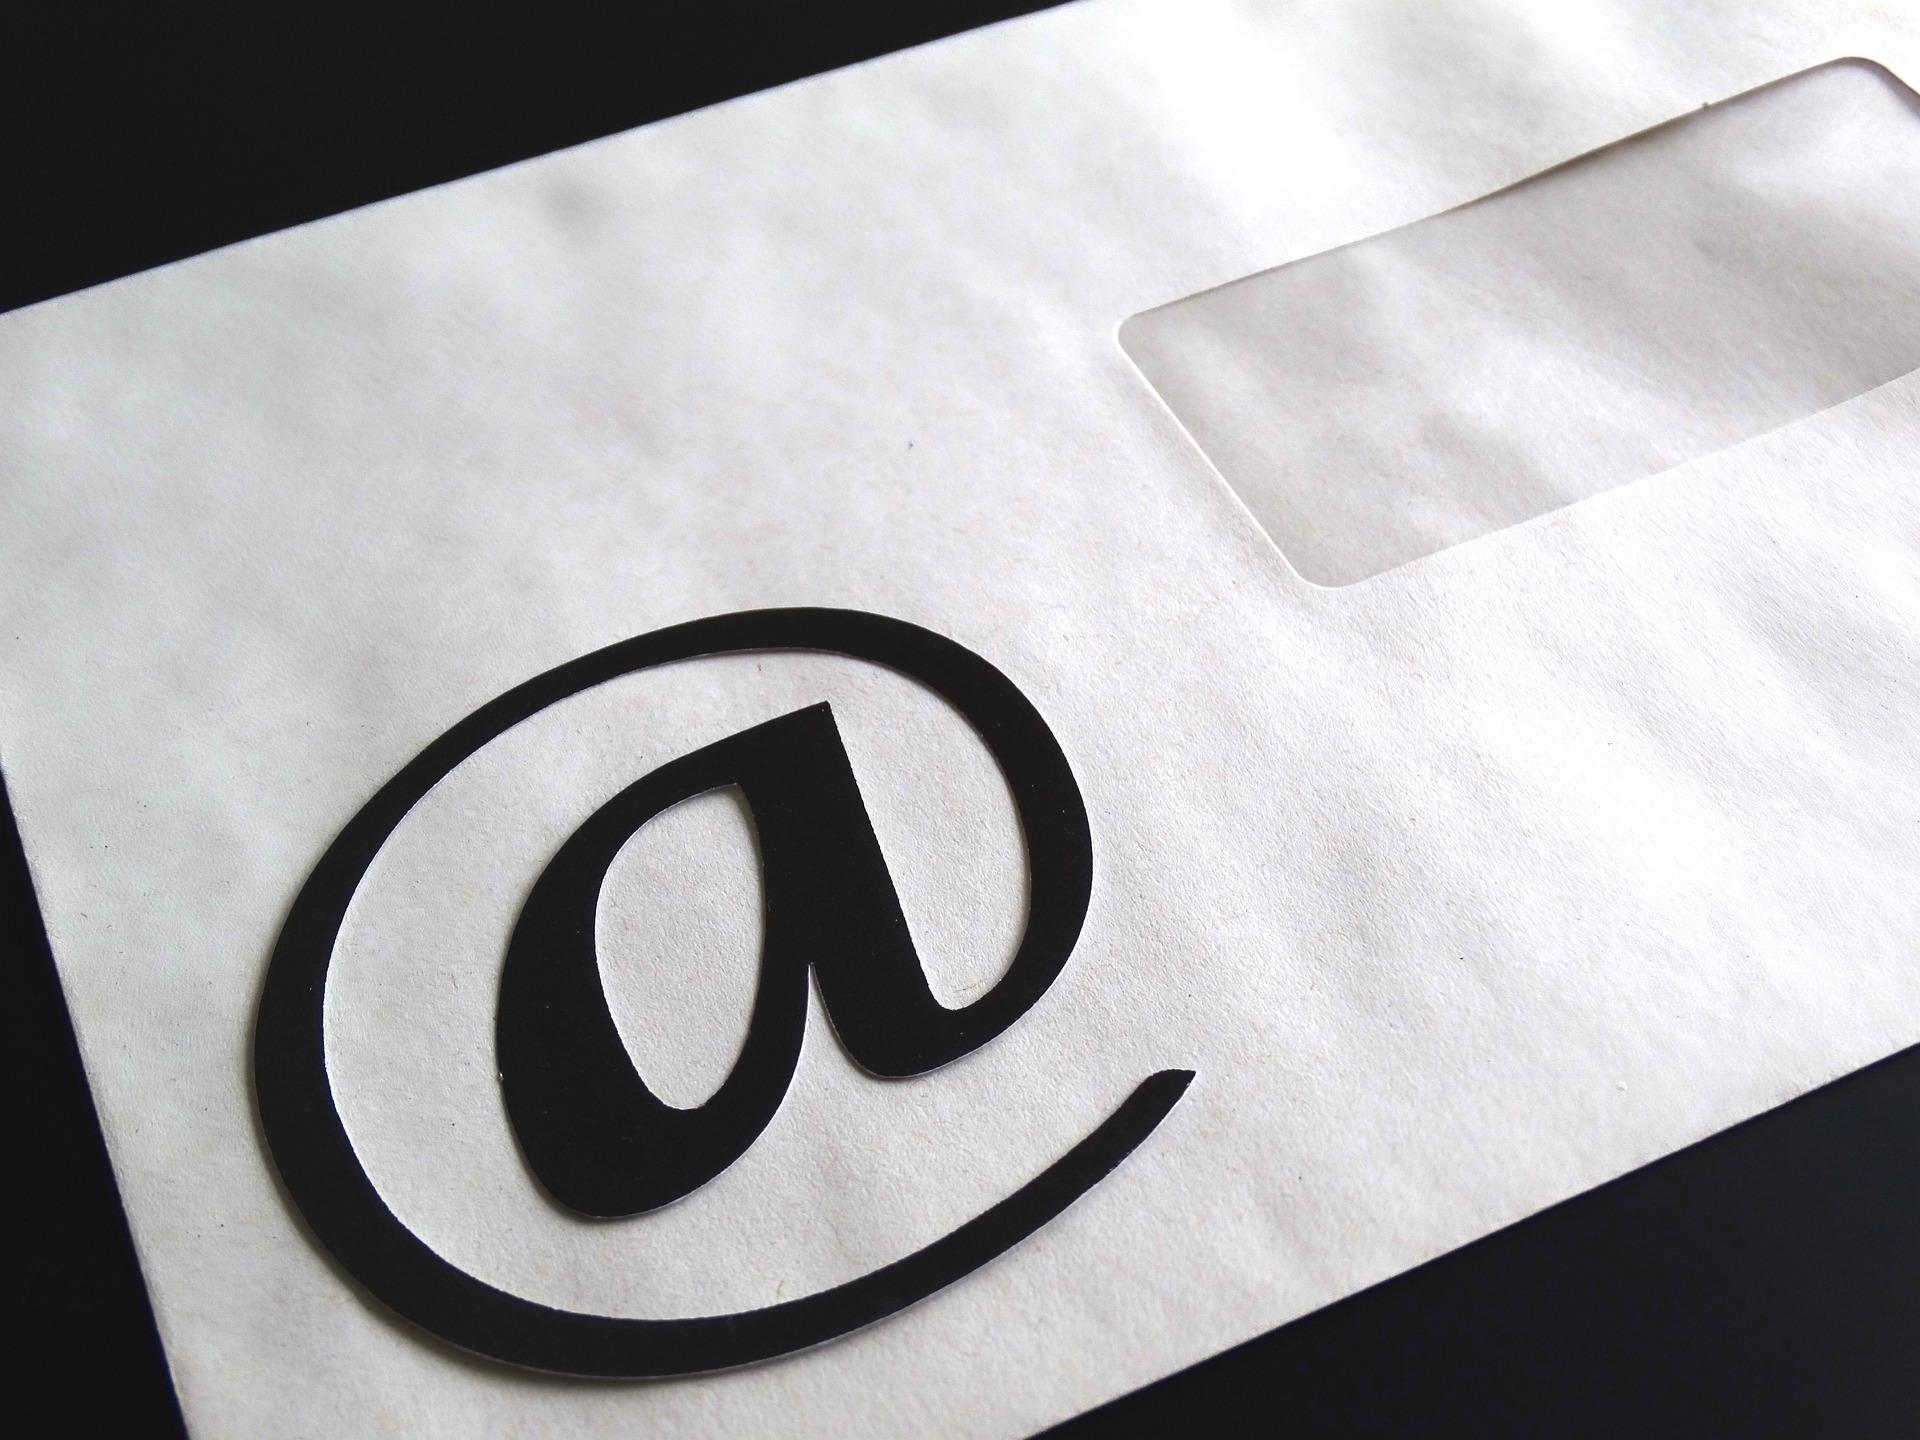

## Problema

La empresa RawInput S.A. desea hacer una segmentación de sus clientes según su ubicación geográfica. Para esto, analizará su base de datos de correos electrónicos con el fin obtener información sobre el lugar de procedencia de cada cliente.

En una dirección de correo electrónico, el dominio es la parte que va después de la arroba, y el TLD es lo que va después del último punto. Por ejemplo, en la dirección fulano.de.tal@alumnos.usm.cl, el dominio es alumnos.usm.cl y el TLD es cl.

Algunos TLD no están asociados a un país, sino que representan otro tipo de entidades. Estos TLD genéricos son los siguentes:

`genericos = {'com', 'gov', 'edu', 'org', 'net', 'mil'}`

1.   Escriba la función obtener_dominios(correos) que reciba como parámetro una lista de correos electrónicos, y retorne la lista de todos los dominios, sin repetir, y en orden alfabético.
2.   Escriba la función contar_tld(correos) que reciba como parámetro la lista de correos electrónicos, y retorne un diccionario que asocie a cada TLD la cantidad de veces que aparece en la lista. No debe incluir los TLD genéricos.

```
c = ['fulano@usm.cl', 'erika@lala.de', 'li@zi.cn', 'a@a.net',

     'gudrun@lala.de', 'otto.von.d@lorem.ipsum.de', 'org@cn.de.cl',

     'yayita@abc.cl', 'jozin@baz.cz', 'jp@foo.cl', 'dawei@hao.cn',

     'pepe@gmail.com', 'ana@usm.cl', 'polo@hotmail.com', 'fer@x.com',

     'ada@alumnos.usm.cl', 'dj@foo.cl', 'jan@baz.cz', 'd@abc.cl']
```

`obtener_dominios(c)`


```
['abc.cl', 'alumnos.usm.cl', 'baz.cz', 'cn.de.cl', 'foo.cl',

'hao.cn', 'lala.de', 'lorem.ipsum.de', 'usm.cl', 'zi.cn']
```

`contar_tld(c)`

`{'cz': 2, 'de': 3, 'cn': 2, 'cl': 8}`

## Solucion

### Importacion de librerias

In [16]:
#Se importa numpy para trabajar mas rapido en caso de agregar mas emails en un futuro
import numpy as np

#Esta libreria se importa para solucionar error de adbertencia al comprobar existencias de dominios en array de numpy
import warnings

### Creacion de la lista

In [3]:
# Lista con dominios aleatorios
c = ['fulano@usm.cl', 'erika@lala.de', 'li@zi.cn', 'a@a.net',

     'gudrun@lala.de', 'otto.von.d@lorem.ipsum.de', 'org@cn.de.cl',

     'yayita@abc.cl', 'jozin@baz.cz', 'jp@foo.cl', 'dawei@hao.cn',

     'pepe@gmail.com', 'ana@usm.cl', 'polo@hotmail.com', 'fer@x.com',

     'ada@alumnos.usm.cl', 'dj@foo.cl', 'jan@baz.cz', 'd@abc.cl']

In [4]:
# lista con dominios genericos
genericos = ['com', 'gov', 'edu', 'org', 'net', 'mil']

In [5]:
#Se pasa la lsita con emails a un array de numpy
emails = np.array(c)

In [6]:
# Se pasa lista de dominios genericos a array de numpy
emails_g = np.array(genericos)

### Funcion que retorna dominios

In [68]:
def dominio(lista_emails):
  # Creo el array que se utilizara para almacenar los dominios
  doms = []

  #Recorrer cada uno de los emails
  for email in lista_emails:

    #Considerando que el ultimo punto puede estar 4 o tres lugares antes del ultimo caracter, realizo dos comprovaciones

    #Compruebo la ubicacion del ultimo punto
    if email[-3] == ('.'):
      dom = str(email[-2:])
      if dom not in doms:
        doms.append(dom)
        
    #Compruebo la ubicacion del ultimo punto  
    if str(email[-4]) == ('.') :
      dom = str(email[-3:])
      if dom not in doms:
        doms.append(dom)

  #Ordeno la lista de dominios
  doms.sort()

  #Retorno el array de dominios
  return(doms)

### Funcion que retorna conteo de dominios originales

In [81]:
def contar(emails, doms):
  #Diccionario que se utilizara para retornar dominios y cantidad de veces que se repiten
  c_tld = {}

  #Se recorren los emails
  for email in emails:
    # Se recorren los dominios
    for dom in doms:
      #Secomprueba que el dominio no este en la lista de genericos
        if dom not in (genericos):
          # Se comprueba que el dominio este dentro del email
          if str('.'+dom) in email:
            #Si el dominio ya esta dentro del diccionario, se le suma un valor, de lo contrario se crea
            try: 
              c_tld[dom] = c_tld[dom] + 1
            except KeyError:
              c_tld[dom] = 1
  return(c_tld)

### Prueba del programa

In [70]:
dominios = dominio(emails)

In [82]:
dic_tld = contar(emails, dominios)

In [80]:
print(dominios)

['cl', 'cn', 'com', 'cz', 'de', 'net']


In [83]:
print(dic_tld)

{'cl': 8, 'de': 4, 'cn': 2, 'cz': 2}
